In [1]:
# Let's Load the Automobile Price data set first
#To do so I'll import the essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
from math import log, sqrt, sin
import matplotlib.pyplot as plt
%matplotlib inline


def read_auto_data(fileName = "C:/Users/Abhishek Nagrecha/Desktop/Data_visualization/Automobile price data.csv"):
    'Function to load the auto price data set from a .csv file' 


    ## Read the .csv file with the pandas read_csv method
    auto_prices = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
#    auto_prices[cols] = auto_prices[cols].as_type(int64)
        
    return auto_prices
auto_prices = read_auto_data()

In [2]:
auto_prices.head(8)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920


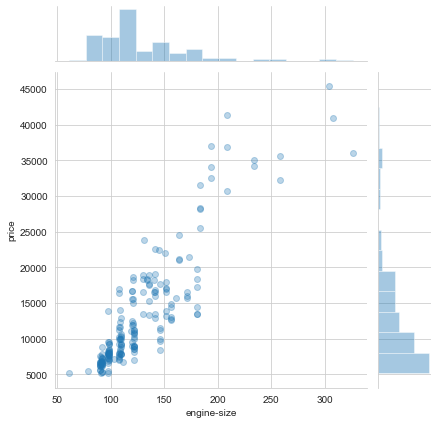

In [3]:
sns.set_style("whitegrid")
sns.jointplot('engine-size', 'price', data = auto_prices, alpha = 0.3)

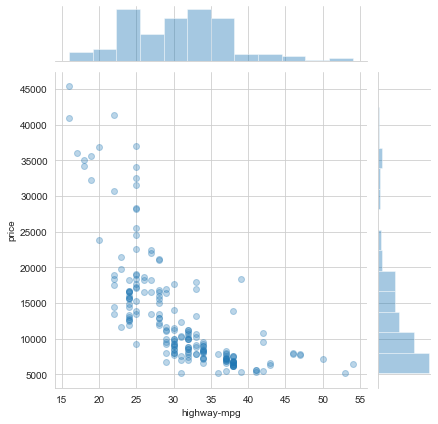

In [4]:
sns.set_style("whitegrid")
sns.jointplot('highway-mpg', 'price', data = auto_prices, alpha = 0.3)

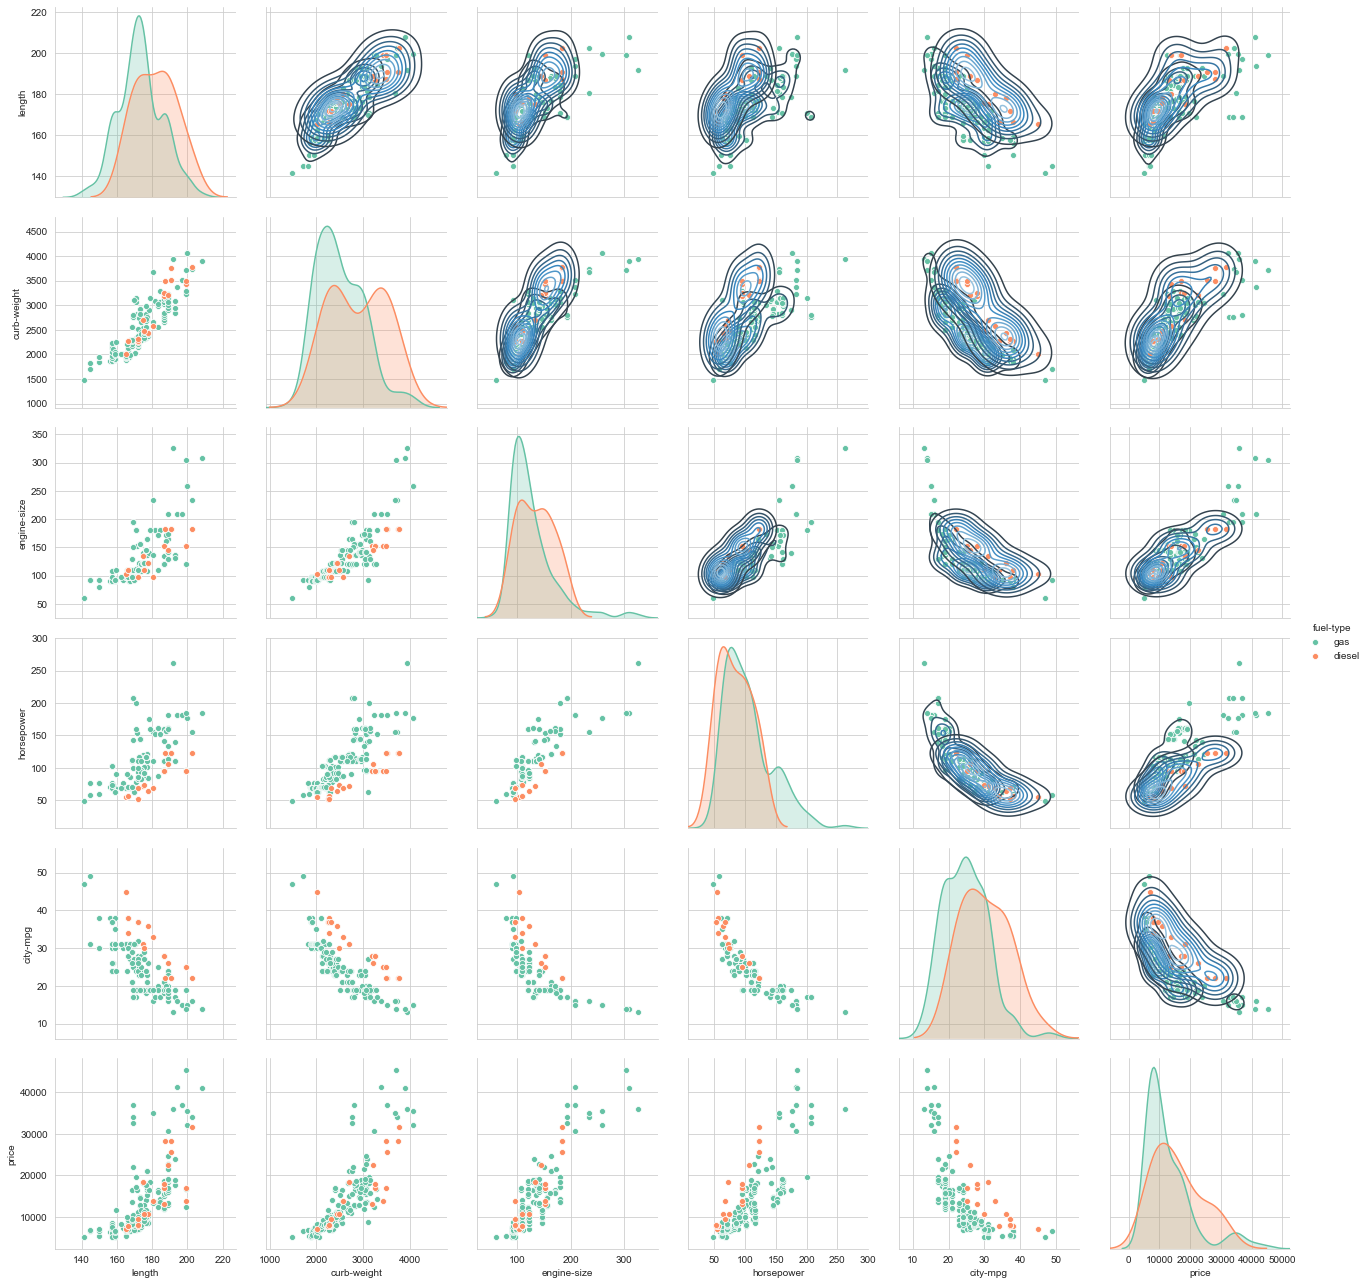

In [6]:
num_cols = ["length", "curb-weight", "engine-size", "horsepower", "city-mpg", "price", "fuel-type"] 
sns.pairplot(auto_prices[num_cols], hue='fuel-type', palette="Set2", diag_kind="kde", size=3).map_upper(sns.kdeplot, cmap="Blues_d")

#Some insights:

#Autos with larger length, curb weight, engine size, and horse power are more expensive.
#Cars with higher curb weights tend to be longer and have larger engines.
#Longer, heavier cars, have larger engines, or more horsepower and are less fuel efficient.

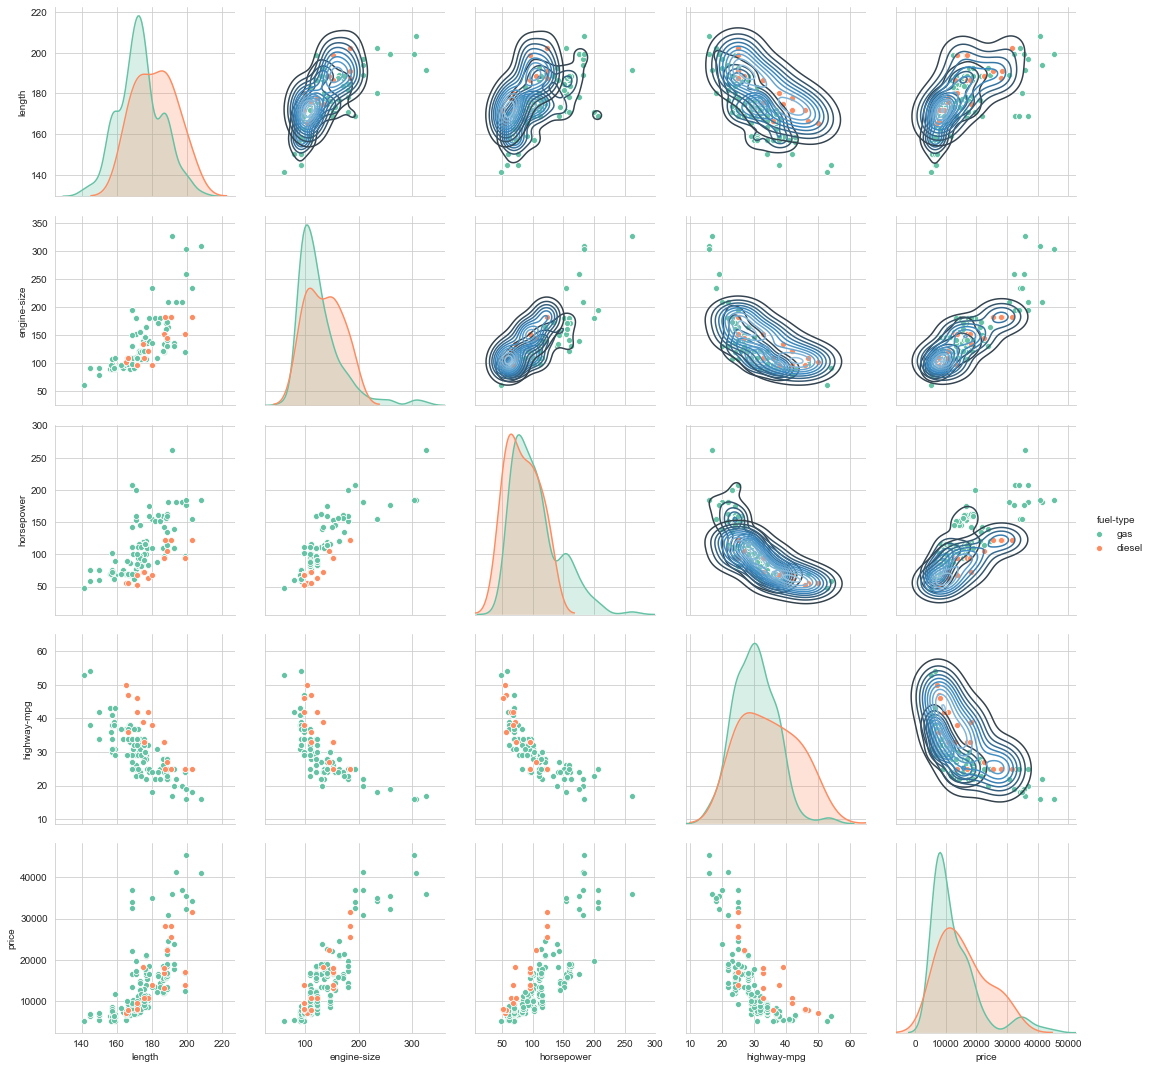

In [7]:
num_cols = ["length", "body-style", "engine-size", "horsepower", "highway-mpg", "price", "fuel-type"] 
sns.pairplot(auto_prices[num_cols], hue='fuel-type', palette="Set2", diag_kind="kde", size=3).map_upper(sns.kdeplot, cmap="Blues_d")

C:\Users\Abhishek Nagrecha\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


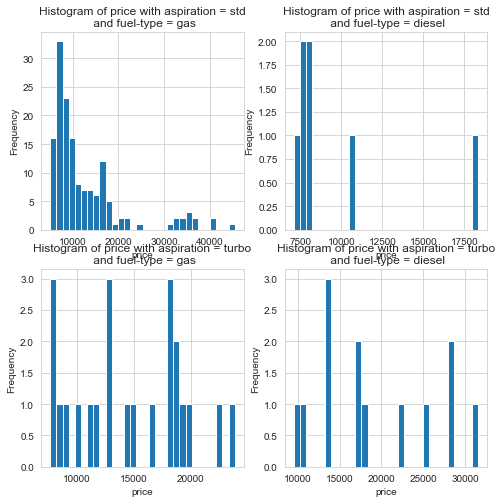

In [8]:
#Multi-axix plots

def plot_multi(df, col, xcol, ycol):
    fig, ax = plt.subplots(2, 2, figsize = (8,8))
    xcols = df[xcol].unique()
    ycols = df[ycol].unique()
    for i, xcl in enumerate(xcols):
        for j, ycl in enumerate(ycols):
            auto_prices.ix[(df[xcol] == xcl) & (df[ycol] == ycl), col].plot.hist(ax = ax[i,j], bins = 30)
            ax[i,j].set_title('Histogram of ' + col + ' with ' + xcol + ' = ' + xcl + '\n and ' + ycol + ' = ' + ycl) 
            ax[i,j].set_xlabel(col) 
plot_multi(auto_prices, 'price', 'aspiration', 'fuel-type')

# Facet plots

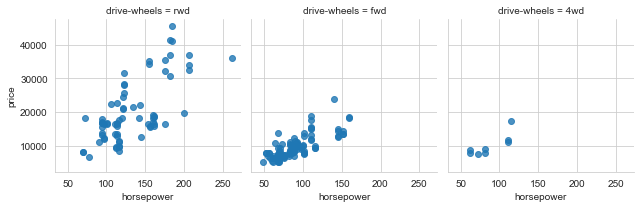

In [10]:
g = sns.FacetGrid(auto_prices, col="drive-wheels")
g.map(sns.regplot, "horsepower", "price", fit_reg = False)

#its observable that rear wheel autos are comparitively expensive.